In [54]:
import geopandas as gpd
import pandas as pd
import numpy as np
from operator import add

%matplotlib inline

from geopandas.geoseries import *
import pylab as pl
from pyproj import Proj

In [2]:
precincts = gpd.read_file('nypp.shp')
precincts = precincts.to_crs({'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True})

In [3]:
hands_on_safety = gpd.read_file('hands_on_safety_demos.shp')
outreach = gpd.read_file('outreach_schools.shp')
seniors = gpd.read_file('senior_centers.shp')
flyers = gpd.read_file('street_team_flyers.shp')
taxis = gpd.read_file('taxi_and_car_service_trainings.shp')

In [4]:
precincts.head(1)

,Precinct,Shape_Area,Shape_Leng,geometry
0,1,47182160.4145,79979.409545,(POLYGON ((-74.04387761573955 40.6901876764099...


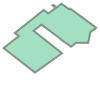

In [5]:
precincts['geometry'][0][2]

In [6]:
hands_on_safety.head(1)

,Activity,Event_Date,Site_Serve,geometry
0,Car Seat Check,2014-10-18,Access Safety City,POINT (-73.94787770755929 40.83613187405008)


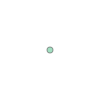

In [7]:
hands_on_safety['geometry'][0]

In [8]:
outreach.head(1)

,Activity,EventDate,SiteServed,geometry
0,Classroom Presentation,02/05/2016,P.S. 101 Verrazano,POINT (-73.99169264240464 40.59786265300934)


In [9]:
seniors.head(1)

,Activity,EventDate,Site_Serve,geometry
0,Senior Presentation,2016-02-01,ST Teresa's Church Senior Program,POINT (-74.11787173668765 40.61343687505688)


In [10]:
flyers.head(1)

,Date,TotalFlyer,geometry
0,10/14/2014,4200,POINT (-73.86649088025413 40.87739338585281)


In [11]:
taxis.head(1)

,Address,Date,Event,geometry
0,1165 Ogden Avenue,2015-12-08,Ogden Car Services Inc,POINT (-73.92701757838053 40.83712512465404)


In [12]:
hands_on_safety['precinct'] = 0
outreach['precinct'] = 0
seniors['precinct'] = 0
flyers['precinct'] = 0
taxis['precinct'] = 0

In [13]:
flyers['Date'][93] = '4/13/2015'
flyers['Date'][94] = '4/20/2015'
flyers['Date'][95] = '4/27/2015'
flyers['Date'] = flyers['Date'].apply(lambda x: x.split(' ')[0])

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
# Bringing the city agencies' stupid datetime values to the same format
hands_on_safety['Event_Date'] = hands_on_safety['Event_Date'].apply(lambda x: str(x)[0:-3])
outreach['EventDate'] = outreach['EventDate'].apply(lambda x: '0'+str(x) if str(x)[1]=='/' else str(x))
outreach['EventDate'] = outreach['EventDate'].apply(lambda x: str(x)[-4:]+'-'+str(x)[0:2])
flyers['Date'] = flyers['Date'].apply(lambda x: '0'+str(x) if str(x)[1]=='/' else str(x))
flyers['Date'] = flyers['Date'].apply(lambda x: str(x)[-4:]+'-'+str(x)[0:2])
seniors['EventDate'] = seniors['EventDate'].apply(lambda x: str(x)[0:-3])
taxis['Date'] = taxis['Date'].apply(lambda x: str(x)[0:-3])

In [15]:
# Calculating what points intersect what precincts for hands on
for k in hands_on_safety.index:
    for v in precincts.index:
        if hands_on_safety['geometry'][k].intersects(precincts['geometry'][v]):
            hands_on_safety['precinct'][k] = precincts['Precinct'][v]            

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
# Calculating what points intersect what precincts outreach
for k in outreach.index:
    for v in precincts.index:
        if outreach['geometry'][k].intersects(precincts['geometry'][v]):
            outreach['precinct'][k] = precincts['Precinct'][v]            

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
# Calculating what points intersect what precincts flyers
for k in flyers.index:
    for v in precincts.index:
        if flyers['geometry'][k].intersects(precincts['geometry'][v]):
            flyers['precinct'][k] = precincts['Precinct'][v]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
# Calculating what points intersect what precincts seniors
for k in seniors.index:
    for v in precincts.index:
        if seniors['geometry'][k].intersects(precincts['geometry'][v]):
            seniors['precinct'][k] = precincts['Precinct'][v]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
# Calculating what points intersect what precincts outreach
for k in taxis.index:
    for v in precincts.index:
        if taxis['geometry'][k].intersects(precincts['geometry'][v]):
            taxis['precinct'][k] = precincts['Precinct'][v]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
# Groupby precinct and time return list
hands_on_safety_gb = hands_on_safety.groupby(['precinct'])['Event_Date'].apply(list)
outreach_gb = outreach.groupby(['precinct'])['EventDate'].apply(list)
seniors_gb = seniors.groupby(['precinct'])['EventDate'].apply(list)
flyers_gb = flyers.groupby(['precinct'])['Date'].apply(list)
taxis_gb = taxis.groupby(['precinct'])['Date'].apply(list)

In [21]:
hands_on_safety_gb = hands_on_safety.groupby(['precinct'])['Event_Date'].apply(list)

In [22]:
hands_on_safety_gb

precinct
1                   [2014-05, 2014-08, 2014-05, 2014-09]
5          [2014-05, 2015-04, 2015-06, 2015-06, 2016-08]
6                                              [2015-11]
9                                              [2016-04]
10                                             [2016-04]
13     [2014-08, 2014-08, 2014-08, 2015-08, 2015-08, ...
14                                    [2014-04, 2015-08]
17                                             [2014-05]
18     [2014-08, 2014-08, 2014-08, 2014-09, 2015-08, ...
19                                    [2015-05, 2016-05]
20                                             [2015-08]
22                                    [2014-06, 2014-06]
23                                    [2015-05, 2015-05]
24                                    [2014-09, 2016-04]
25                                                   [N]
26                                    [2014-06, 2016-07]
30                           [2015-06, 2015-11, 2015-06]
33     [2014-10, 2014-

In [23]:
# Calculate frequencies of events by date per precinct for hands on
hands_on_dict = {}
for item in hands_on_safety_gb.iteritems():
    unique_items, counts = np.unique(item[1], return_counts=True)
    hands_on_dict[item[0]] = zip(unique_items, counts)

In [24]:
# Calculate frequencies of events by date per precinct for outreach
outreach_dict = {}
for item in outreach_gb.iteritems():
    unique_items, counts = np.unique(item[1], return_counts=True)
    outreach_dict[item[0]] = zip(unique_items, counts)

In [25]:
# Calculate frequencies of events by date per precinct for seniors
seniors_dict = {}
for item in seniors_gb.iteritems():
    unique_items, counts = np.unique(item[1], return_counts=True)
    seniors_dict[item[0]] = zip(unique_items, counts)

In [26]:
# Calculate frequencies of events by date per precinct for flyers
flyers_dict = {}
for item in flyers_gb.iteritems():
    unique_items, counts = np.unique(item[1], return_counts=True)
    flyers_dict[item[0]] = zip(unique_items, counts)

In [27]:
# Calculate frequencies of events by date per precinct for outreach
taxis_dict = {}
for item in taxis_gb.iteritems():
    unique_items, counts = np.unique(item[1], return_counts=True)
    taxis_dict[item[0]] = zip(unique_items, counts)

In [28]:
hands_on_dict

{1: [('2014-05', 2), ('2014-08', 1), ('2014-09', 1)],
 5: [('2014-05', 1), ('2015-04', 1), ('2015-06', 2), ('2016-08', 1)],
 6: [('2015-11', 1)],
 9: [('2016-04', 1)],
 10: [('2016-04', 1)],
 13: [('2014-08', 3), ('2015-08', 3), ('2016-08', 6)],
 14: [('2014-04', 1), ('2015-08', 1)],
 17: [('2014-05', 1)],
 18: [('2014-08', 3),
  ('2014-09', 1),
  ('2015-08', 3),
  ('2016-07', 1),
  ('2016-08', 3)],
 19: [('2015-05', 1), ('2016-05', 1)],
 20: [('2015-08', 1)],
 22: [('2014-06', 2)],
 23: [('2015-05', 2)],
 24: [('2014-09', 1), ('2016-04', 1)],
 25: [('N', 1)],
 26: [('2014-06', 1), ('2016-07', 1)],
 30: [('2015-06', 2), ('2015-11', 1)],
 33: [('2014-07', 1),
  ('2014-08', 1),
  ('2014-10', 1),
  ('2015-04', 1),
  ('2015-05', 1),
  ('2015-06', 2),
  ('2015-08', 1),
  ('2015-09', 2),
  ('2015-10', 1),
  ('2015-11', 1),
  ('2016-03', 1),
  ('2016-07', 1),
  ('N', 1)],
 34: [('2014-04', 1), ('2014-09', 1), ('2015-06', 2)],
 40: [('2014-04', 1), ('2015-05', 2)],
 41: [('2015-05', 1)],
 42: 

In [29]:
outreach_dict

{0: [('2014-01', 1), ('2014-02', 2), ('2014-03', 3), ('2014-04', 1)],
 1: [('2014-01', 1), ('2014-10', 1), ('2016-04', 1), ('2016-06', 1)],
 5: [('2014-02', 1),
  ('2014-03', 1),
  ('2015-05', 1),
  ('2015-10', 1),
  ('2016-01', 1)],
 6: [('2014-03', 1), ('2014-09', 2), ('2016-04', 1), ('2016-05', 1)],
 7: [('2014-01', 1),
  ('2014-09', 1),
  ('2014-11', 2),
  ('2014-12', 1),
  ('2015-05', 4),
  ('2015-06', 3),
  ('2015-11', 3),
  ('2015-12', 1),
  ('2016-04', 1),
  ('2016-05', 1)],
 9: [('2014-01', 4), ('2014-10', 1), ('2016-01', 1), ('2016-02', 1)],
 10: [('2014-10', 1), ('2015-11', 1)],
 13: [('2014-01', 1),
  ('2014-03', 1),
  ('2014-09', 2),
  ('2015-03', 2),
  ('2015-05', 2),
  ('2015-10', 1),
  ('2016-04', 1)],
 17: [('2014-05', 1), ('2016-01', 1), ('2016-02', 1)],
 18: [('2014-08', 1), ('2014-09', 1), ('2014-10', 1), ('2015-04', 1)],
 19: [('2014-01', 1),
  ('2014-09', 1),
  ('2014-10', 1),
  ('2015-06', 1),
  ('2015-10', 1),
  ('2015-12', 1),
  ('2016-01', 1),
  ('2016-06', 1)

In [30]:
seniors_dict

{5: [('2014-01', 1),
  ('2014-12', 1),
  ('2015-07', 2),
  ('2015-09', 1),
  ('2016-01', 1),
  ('2016-03', 2),
  ('2016-04', 1),
  ('2016-06', 1)],
 6: [('2015-08', 1)],
 7: [('2014-01', 1),
  ('2014-10', 3),
  ('2015-06', 1),
  ('2015-07', 1),
  ('2016-02', 1)],
 9: [('2015-03', 1), ('2015-12', 1), ('2016-04', 1)],
 10: [('2014-12', 1), ('2015-04', 2), ('2015-08', 1)],
 13: [('2016-04', 1)],
 14: [('2014-04', 2), ('2014-05', 2)],
 17: [('2016-05', 1)],
 18: [('2014-04', 2)],
 19: [('2014-03', 6),
  ('2014-04', 5),
  ('2014-06', 2),
  ('2015-05', 1),
  ('2015-07', 1),
  ('2016-06', 1)],
 20: [('2014-05', 2)],
 23: [('2014-01', 1), ('2014-06', 3), ('2015-07', 1)],
 24: [('2014-03', 1), ('2014-09', 1), ('2016-06', 1)],
 25: [('2014-01', 1), ('2014-09', 1)],
 28: [('2014-07', 1),
  ('2014-08', 1),
  ('2014-12', 1),
  ('2015-10', 2),
  ('2015-11', 2)],
 30: [('2014-06', 1)],
 32: [('2016-06', 1), ('2016-07', 1)],
 33: [('2015-03', 1)],
 34: [('2015-06', 1), ('2016-03', 1)],
 42: [('2015-07

In [31]:
flyers_dict

{1: [('2014-07', 1), ('2014-08', 4), ('2014-09', 2)],
 5: [('2014-08', 1), ('2014-10', 1), ('2014-11', 1)],
 7: [('2014-11', 4)],
 17: [('2014-05', 2)],
 19: [('2014-05', 1)],
 24: [('2014-06', 1)],
 26: [('2014-06', 4)],
 33: [('2014-09', 2)],
 34: [('2014-09', 3)],
 40: [('2015-04', 1)],
 43: [('2014-07', 3)],
 46: [('2014-03', 1), ('2014-04', 1)],
 47: [('2014-10', 4)],
 50: [('2014-09', 5)],
 66: [('2014-09', 5)],
 69: [('14\r\n-11', 1), ('2014-11', 4)],
 71: [('2014-06', 3)],
 75: [('2014-10', 4)],
 77: [('2014-08', 1)],
 79: [('2014-08', 4)],
 84: [('2015-04', 1)],
 90: [('2014-05', 2)],
 94: [('2014-05', 1)],
 101: [('2014-10', 4)],
 102: [('2014-06', 4)],
 103: [('2014-07', 4)],
 108: [('2015-04', 1)],
 109: [('2014-09', 5)],
 114: [('2014-11', 5)],
 115: [('2014-04', 1)],
 120: [('2014-07', 1)],
 121: [('2014-05', 2)],
 122: [('2014-07', 1)]}

In [32]:
taxis_dict

{1: [('2014-06', 5), ('2014-07', 4), ('2015-07', 2), ('2015-10', 1)],
 5: [('2015-06', 2), ('2015-07', 1)],
 7: [('2015-06', 1), ('2015-07', 1)],
 10: [('2015-10', 2)],
 13: [('2015-07', 1)],
 14: [('2014-10', 2),
  ('2015-02', 1),
  ('2015-06', 2),
  ('2015-07', 1),
  ('2015-08', 2),
  ('2015-10', 1)],
 18: [('2015-07', 1)],
 19: [('2015-07', 1)],
 23: [('2015-07', 2)],
 24: [('2014-03', 1), ('2014-09', 1)],
 25: [('2015-07', 2)],
 26: [('2014-06', 1)],
 28: [('2014-05', 1)],
 30: [('2014-08', 1), ('2015-07', 2), ('2015-08', 2)],
 33: [('2014-08', 2), ('2015-06', 1), ('2015-07', 2), ('2015-08', 1)],
 34: [('2014-08', 1), ('2014-09', 1), ('2015-07', 3)],
 40: [('2015-02', 2), ('2015-03', 2), ('2015-07', 1), ('2015-12', 2)],
 41: [('2015-12', 1)],
 42: [('2015-03', 1), ('2015-12', 1)],
 44: [('2015-02', 1), ('2015-06', 1), ('2015-12', 1), ('2016-01', 1)],
 45: [('2015-07', 1)],
 46: [('2015-02', 1), ('2015-07', 2)],
 48: [('2015-03', 1), ('2015-06', 2), ('2015-07', 1), ('2016-01', 1)],


In [33]:
# Flattening the dictionaries into unnested lists
def flatdict(dictionary):
    flat = [[str(x)+str(r[0])[-2:]+str(r[0])[0:4]+":"+str(r[1]) for r in dictionary[x]] for x in dictionary]
    flat = [x for y in flat for x in y]
    result = {}
    for l in flat:
        s = l.split(':')
        result[s[0]] = s[1]
    return result

In [34]:
taxis_dict_flat = flatdict(taxis_dict)
flyers_dict_flat = flatdict(flyers_dict)
seniors_dict_flat = flatdict(seniors_dict)
outreach_dict_flat = flatdict(outreach_dict)
hands_on_dict_flat = flatdict(hands_on_dict)

In [35]:
precinct_date = taxis_dict_flat.keys()+flyers_dict_flat.keys()+seniors_dict_flat.keys()+\
                outreach_dict_flat.keys()+hands_on_dict_flat.keys()

In [36]:
def findunique(a):
    unique = [a[0]]
    for i in range(1, len(a)):
        c = 0
        for j in range(0, len(unique)):
            if a[i] <> unique[j]:
                c+=1
                if c == len(unique):
                    unique.append(a[i])
    return unique

In [37]:
precinct_date = findunique(precinct_date)

In [38]:
final_dictionary = {}
for p in precinct_date:
    rec = [0, 0, 0, 0, 0]
    if p in taxis_dict_flat.keys():
        rec[0] = int(taxis_dict_flat[p])
    if p in flyers_dict_flat.keys():
        rec[1] = int(flyers_dict_flat[p])
    if p in seniors_dict_flat.keys():
        rec[2] = int(seniors_dict_flat[p])
    if p in outreach_dict_flat.keys():
        rec[3] = int(outreach_dict_flat[p])
    if p in hands_on_dict_flat.keys():
        rec[4] = int(hands_on_dict_flat[p])
    final_dictionary[p] = rec

In [90]:
new_dictionary = {}
for item in final_dictionary:
    if item[:-6]+item[-4:] not in new_dictionary:
        new_dictionary[item[:-6]+item[-4:]] = final_dictionary[item]
    else:
        new_dictionary[item[:-6]+item[-4:]] = map(add, new_dictionary[item[:-6]+item[-4:]], final_dictionary[item])

In [118]:
new_dictionary_ = {}
for item in new_dictionary:
    if item.isdigit() == True:
        new_dictionary_[item] = new_dictionary[item]

In [119]:
df = pd.DataFrame(new_dictionary_.items(), columns=['PrecinctYear', 'Data'])

In [120]:
df['Precinct'] = df['PrecinctYear'].apply(lambda x: x[:-4])
df['Year'] = df['PrecinctYear'].apply(lambda x: x[-4:])
df['Taxis'] = df['Data'].apply(lambda x: x[0])
df['Flyers'] = df['Data'].apply(lambda x: x[1])
df['Seniors'] = df['Data'].apply(lambda x: x[2])
df['Outreach'] = df['Data'].apply(lambda x: x[3])
df['HandsOn'] = df['Data'].apply(lambda x: x[4])

In [121]:
del df['Data']

In [122]:
df['Total'] = df['Taxis'] + df['Flyers'] + df['Seniors'] + df['Outreach'] + df['HandsOn']

In [125]:
df.head(5)

,PrecinctYear,Precinct,Year,Taxis,Flyers,Seniors,Outreach,HandsOn,Total
0,442016,44,2016,1,0,1,6,0,8
1,442015,44,2015,3,0,0,25,1,29
2,442014,44,2014,0,0,0,12,3,15
3,252014,25,2014,0,0,2,12,0,14
4,252015,25,2015,2,0,0,6,0,8


In [126]:
df.to_csv('Education_Data.csv')

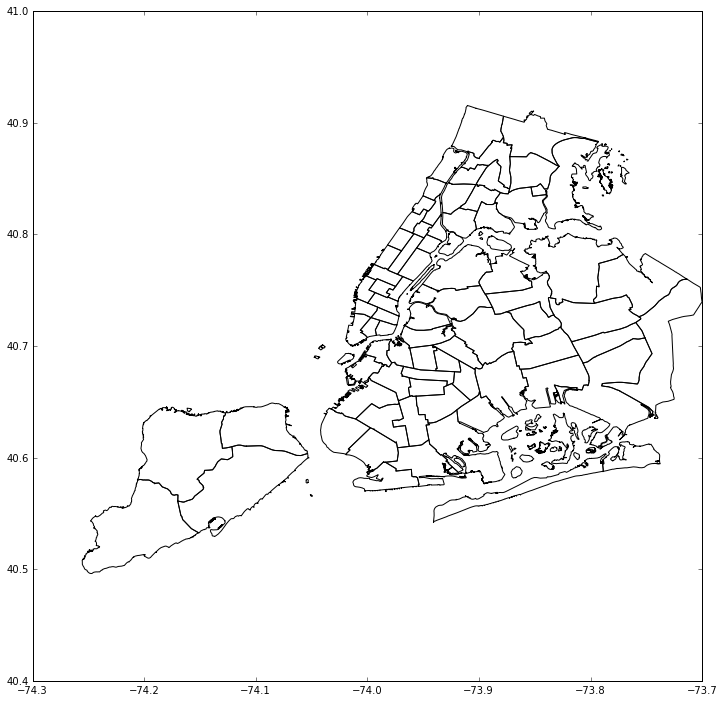

In [45]:
fig = pl.figure(figsize=(12, 12)) 
plot1 = precincts.plot(colormap = 'Greys', alpha =0)